# Agrupamento de dados


In [1]:
import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas

In [2]:
data = pd.read_csv('shenzhenPlatoons13.csv')
print(data.shape)
print(data.head())

(2004, 9)
   Unnamed: 0     id        lat        long  hour  proj  pltGrp  pltPosition  \
0           0  22879  22.713200  113.823898     6    27       0            0   
1           1  22880  22.619600  113.857002    12    24       1            0   
2           2  22881  22.668600  114.027702    16     7       2            0   
3           3  22882  22.682301  114.044800     0     6       3            0   
4           4  22883  22.672199  114.026199    14     8       4            0   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  


In [3]:
#X = data[['lat', 'long', 'hour']]
X = data[['long', 'hour']]

In [4]:
X

,long,hour
0,113.823898,6
1,113.857002,12
2,114.027702,16
3,114.044800,0
4,114.026199,14
...,...,...
1999,114.028397,16
2000,113.935081,22
2001,113.863953,21
2002,113.843231,3


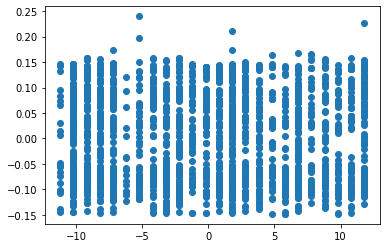

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

pca = PCA(n_components=2)
imputer = SimpleImputer()

Xpca = pca.fit_transform(imputer.fit_transform(X))

plt.scatter(Xpca[:, 0], Xpca[:, 1])
plt.show()

In [6]:
# Sementes aleatórias para reproducibilidade dos experimentos (reproducão dos experimentos)
seeds = [11156, 28750, 3509, 20838, 5907, 
         20167, 10632, 26137, 12628, 13922, 
         1124, 32301, 17230, 21, 7432, 
         16445, 29820, 28931, 11104, 2741]
# O ideal são 100 bootstraps

## Determinando número de grupos

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

from sklearn.utils import resample

In [8]:
result = {}
for k in range(2, 20):
  result[f'k={k}'] = []
  for seed in seeds:
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()
    alg = KMeans(n_clusters=k, random_state=seed)
    #alg = AgglomerativeClustering(n_clusters=k, linkage='single')

    Xb = resample(X, random_state=seed) # Reamostragem da base de dados (bootstrapping)
    Xb = scaler.fit_transform(imputer.fit_transform(Xb))

    clusters = alg.fit_predict(Xb)
    result[f'k={k}'].append(silhouette_score(Xb, clusters))

result = pd.DataFrame.from_dict(result)
print(result)

         k=2       k=3       k=4       k=5       k=6       k=7       k=8  \
0   0.388540  0.404265  0.447041  0.434354  0.407939  0.423566  0.412152   
1   0.393217  0.413924  0.448039  0.450592  0.416918  0.428860  0.430061   
2   0.393043  0.399462  0.442364  0.431696  0.420743  0.439205  0.433635   
3   0.396299  0.408952  0.447768  0.434487  0.408052  0.426323  0.419121   
4   0.381518  0.391484  0.435320  0.435367  0.415446  0.433157  0.421505   
5   0.393180  0.400537  0.444443  0.437708  0.417427  0.441569  0.433373   
6   0.390627  0.415343  0.449492  0.442129  0.407931  0.421620  0.412182   
7   0.391434  0.400324  0.439632  0.444037  0.420462  0.432017  0.429398   
8   0.387612  0.402004  0.443981  0.430111  0.402248  0.419213  0.417008   
9   0.391493  0.409661  0.451873  0.445400  0.414497  0.433001  0.430162   
10  0.384759  0.397004  0.436499  0.427494  0.406126  0.425881  0.410835   
11  0.385093  0.398452  0.433843  0.435793  0.406961  0.421578  0.414465   
12  0.388213

In [10]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

k=2     0.39 ± 0.00
k=3     0.40 ± 0.01
k=4     0.45 ± 0.01
k=5     0.44 ± 0.01
k=6     0.41 ± 0.01
k=7     0.43 ± 0.01
k=8     0.42 ± 0.01
k=9     0.41 ± 0.01
k=10    0.41 ± 0.01
k=11    0.41 ± 0.01
k=12    0.41 ± 0.01
k=13    0.40 ± 0.01
k=14    0.40 ± 0.01
k=15    0.40 ± 0.01
k=16    0.40 ± 0.01
k=17    0.40 ± 0.01
k=18    0.39 ± 0.01
k=19    0.40 ± 0.00
dtype: object

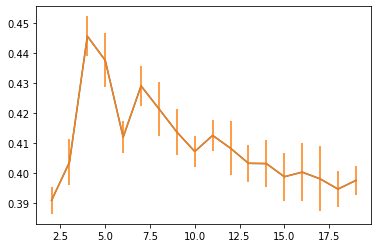

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(2, 20), result.mean())
plt.errorbar(range(2, 20), result.mean(), result.std())
plt.show()

## Melhores grupos (deploying)

In [12]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
Xfixed = imputer.fit_transform(scaler.fit_transform(X))

alg = KMeans(n_clusters=4, random_state=seed)
clusters = alg.fit_predict(Xfixed)

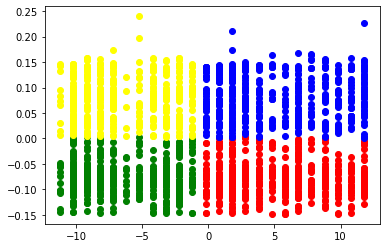

In [13]:
for k in range(4):
    plt.scatter(Xpca[np.where(clusters == k), 0], Xpca[np.where(clusters == k), 1], color=['red', 'blue', 'green', 'yellow', 'gray'][k])
plt.show()

In [14]:
k = 4
algorithms = {
    'kmeans':  KMeans(n_clusters=k),
    'single': AgglomerativeClustering(n_clusters=k, linkage='single'),
    'average': AgglomerativeClustering(n_clusters=k, linkage='average'),
    'complete': AgglomerativeClustering(n_clusters=k, linkage='complete'),
    'dbscan': DBSCAN(eps = 0.09, min_samples = 2, metric = 'euclidean'),
}

In [15]:
result = {}
for key, alg in algorithms.items():
  result[key] = []
  for seed in seeds:
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    Xb = scaler.fit_transform(imputer.fit_transform(resample(X, random_state=seed)))
    clusters = alg.fit_predict(Xb)
    result[key].append(silhouette_score(Xb, clusters))

result = pd.DataFrame.from_dict(result)

In [16]:
print(result)

      kmeans    single   average  complete    dbscan
0   0.447041  0.204495  0.332667  0.384457  0.390076
1   0.448039  0.130780  0.306762  0.329706  0.354617
2   0.442364  0.182895  0.239124  0.368498  0.378397
3   0.447768  0.085363  0.374252  0.383293  0.394051
4   0.436150  0.177716  0.266940  0.326755  0.378728
5   0.444443  0.181733  0.344890  0.379448  0.372575
6   0.449492  0.133792  0.304673  0.357402  0.411695
7   0.439632  0.107701  0.325825  0.353998  0.356952
8   0.443981  0.194967  0.342988  0.317260  0.357254
9   0.451918  0.205531  0.313657  0.399087  0.381322
10  0.436499  0.169616  0.297616  0.354946  0.410457
11  0.433790  0.204241  0.353347  0.395571  0.438069
12  0.445397  0.175640  0.337442  0.349802  0.389597
13  0.441817  0.148752  0.309447  0.376740  0.375637
14  0.454371 -0.107817  0.407368  0.376935  0.349533
15  0.450071  0.205470  0.418312  0.376031  0.412282
16  0.448711  0.063821  0.396287  0.357230  0.326239
17  0.438110  0.115534  0.361221  0.363653  0.

In [17]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kmeans      0.45 ± 0.01
single      0.15 ± 0.07
average     0.34 ± 0.05
complete    0.36 ± 0.02
dbscan      0.38 ± 0.03
dtype: object

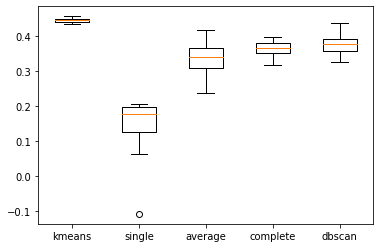

In [18]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.show()